In [ ]:
! pip install pylatexenc
! pip install qiskit

In [5]:
# initialization
from numpy import pi

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

Evaluating simulating time for a varying size quantum circuit:

simulation started for 2 qubits
Simulation total time= 0.020663022994995117 s
simulation started for 3 qubits
Simulation total time= 0.02909684181213379 s
simulation started for 4 qubits
Simulation total time= 0.02052021026611328 s
simulation started for 5 qubits
Simulation total time= 0.011950016021728516 s
simulation started for 6 qubits
Simulation total time= 0.015392065048217773 s
simulation started for 7 qubits
Simulation total time= 0.024508953094482422 s
simulation started for 8 qubits
Simulation total time= 0.04265904426574707 s
simulation started for 9 qubits
Simulation total time= 0.13711881637573242 s
simulation started for 10 qubits
Simulation total time= 0.2997860908508301 s
simulation started for 11 qubits
Simulation total time= 0.3663630485534668 s
simulation started for 12 qubits
Simulation total time= 0.8634161949157715 s
simulation started for 13 qubits
Simulation total time= 1.2524089813232422 s
simulation started for 14 qubits
Simulation total time= 2.60746812820434

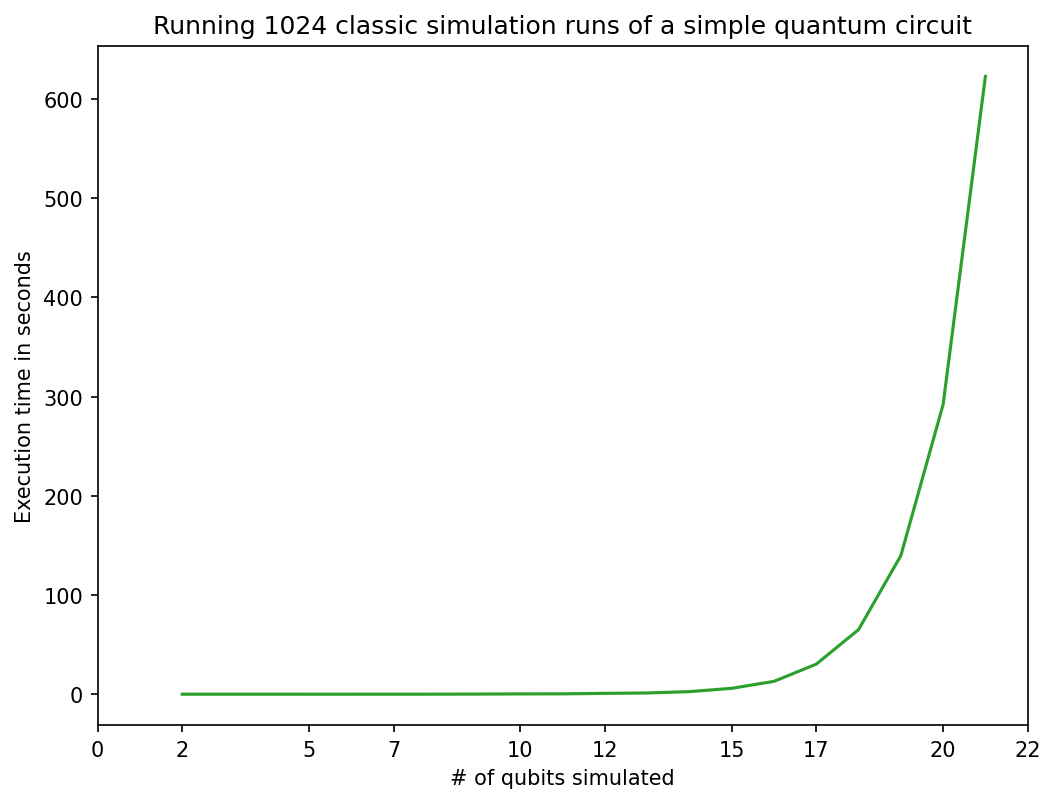

In [21]:
import time
import pandas as pd
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=150)

def createCircuit(n):
    # Deterministic cluster states example
    qreg_q = QuantumRegister(n, 'q')
    creg_c = ClassicalRegister(n, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    for i in range(0,n):
        circuit.reset(qreg_q[i])
        # circuit.x(qreg_q[i])

    # Init "control bit" qunatum
    circuit.h(qreg_q[0])

    # Cycle
    for i in range(n-1,0,-1):
        circuit.barrier()
        circuit.cx(qreg_q[0],qreg_q[i])
        circuit.sdg(qreg_q[0])
        circuit.u(pi/2, pi/3, pi/4, qreg_q[i])

    circuit.barrier()
    for i in range(0,n):
        circuit.measure(qreg_q[i],creg_c[i])
    return circuit

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
# shots = 1000000 # max shots

timesData = pd.DataFrame([], columns=['qubits', 'sim_time'])
lastTime = 0
for i in range(2,10):
    circ = createCircuit(i)
    print('simulation started for', i, 'qubits')
    start = time.time()
    results = aer_sim.run(circ, shots=shots).result()
    answer = results.get_counts()
    end = time.time()
    lastTime = end-start
    print('Simulation total time=',lastTime,'s')
    newDf = pd.DataFrame([[i,lastTime]], columns=['qubits', 'sim_time'])
    timesData = timesData.append(newDf, ignore_index=True)

pyplot.plot(timesData['qubits'], timesData['sim_time'], 'C2')
pyplot.xlabel("# of qubits simulated")
pyplot.ylabel("Execution time in seconds")
pyplot.title('Running 1024 classic simulation runs of a simple quantum circuit')

xint = []
locs, labels = pyplot.xticks()
for each in locs:
    xint.append(int(each))
pyplot.xticks(xint)

pyplot.show()
# plot_histogram(answer)